In [107]:
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print(torch.cuda.current_device())
    print(torch.cuda.device_count())
    print(torch.cuda.get_device_name(0))

device
#For screenshots please refer Assignment_1a_screenshots.pdf

device(type='cpu')

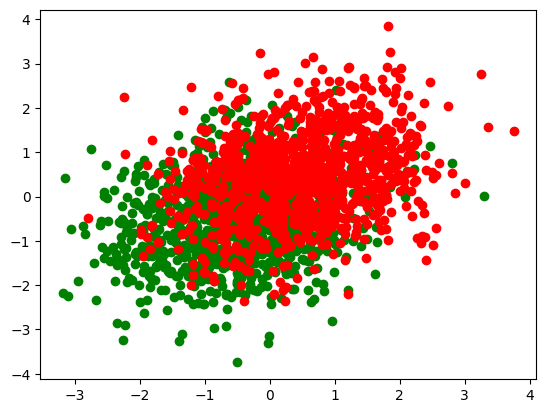

X: tensor([[-0.3822, -0.8319],
        [-1.7932, -0.9008],
        [-0.6652, -2.5339],
        ...,
        [ 0.1220,  1.2217],
        [ 2.1660,  1.8089],
        [ 0.8980,  0.1606]]) 
X Shape torch.Size([2000, 2])


In [223]:
import torch
import matplotlib.pyplot as plt
import numpy as np
covariance = torch.tensor([[1, 0.25],[0.25, 1]])
mean_a = torch.tensor([-0.5, -0.5])
mean_b = torch.tensor([0.5, 0.5])
normal_distribution_a = torch.distributions.MultivariateNormal(mean_a, covariance).sample((1000,))
normal_distribution_b = torch.distributions.MultivariateNormal(mean_b, covariance).sample((1000,))
X = torch.cat([normal_distribution_a, normal_distribution_b])
plt.plot(normal_distribution_a[:,0], normal_distribution_a[:,1],'go')
plt.plot(normal_distribution_b[:,0], normal_distribution_b[:,1],'ro')
plt.show()
print("X:", X, "\nX Shape", X.shape)



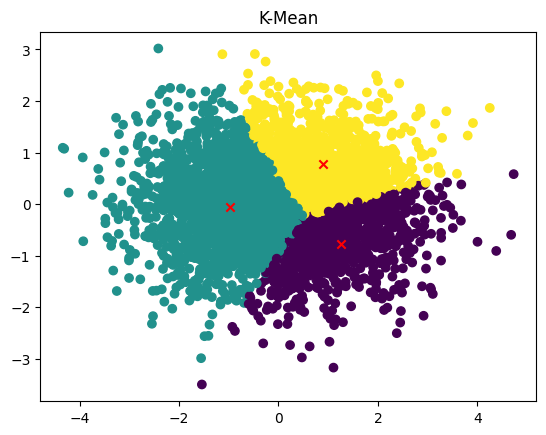

Data: tensor([[-1.2585,  0.8538],
        [-0.4940, -1.5063],
        [-1.3383, -0.5669],
        ...,
        [ 2.1486,  1.3796],
        [ 0.4516,  1.4205],
        [-0.4896, -0.7213]])


In [224]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from IPython.display import clear_output
from sklearn.cluster import KMeans
covariance = torch.tensor([[1, 0.25],[0.25, 1]])
mean_a = torch.tensor([-0.5, -0.5])
mean_b = torch.tensor([0.5, 0.5])
normal_distribution_a = torch.distributions.MultivariateNormal(mean_a, covariance).sample((2000,))
normal_distribution_b = torch.distributions.MultivariateNormal(mean_b, covariance).sample((2000,))
data = torch.cat([normal_distribution_a, normal_distribution_b])
n = 100
i = 1
clusters = 3
index = torch.randperm(data.shape[0])[:clusters]
centroids = data[index]
old_centroids = torch.zeros_like(centroids)
for i in range(n):
    if torch.all(torch.isclose(centroids, old_centroids)):
        break
    old_centroids = centroids
    distance = torch.cdist(data, centroids)
    labels = torch.argmin(distance, dim=1)
    for j in range(clusters):
        cluster_points = data[labels == j]
        if cluster_points.size(0) > 0:  
            centroids[j] = cluster_points.mean(dim=0)
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data.numpy())
    centroids_2d = pca.transform(centroids.numpy())
    plt.title('K-Mean')
    plt.scatter(data_2d[:,0], data_2d[:,1],c=labels.numpy())
    plt.scatter(centroids_2d[:,0], centroids_2d[:,1],c='red', marker='x')
    plt.show()
print("Data:", data)



    

 

In [219]:
import torch

X=torch.normal(0,1,(100,4))
X[:,2] = 3 * X[:,0] - 2 * X[:,1] + torch.normal(0, 0.1, (100,))
X[:,3] = 1.5 * X[:,0] - 0.5 * X[:,1] + torch.normal(0, 0.1, (100,))
X = X - torch.mean(X, axis=0)
pca = PCA(n_components=4)
pca.fit(X)
principal_comps_builtin = pca.components_.T
print("PCA:",principal_comps_builtin)
matrix = torch.sum(torch.stack([X[i].reshape(-1,1) @ X[i].reshape(1,-1) for i in range(100)]), dim=0) / 100
eigenvalues, eigenvectors = torch.linalg.eigh(matrix)
order = torch.argsort(eigenvalues, descending=True)
principal_comps_byhand = eigenvectors[:,order]
print("PCA by hand:",principal_comps_byhand)

PCA: [[ 0.21002388  0.48663816 -0.18793932  0.82689303]
 [-0.12825543  0.7956897  -0.30779872 -0.5056564 ]
 [ 0.89169307 -0.14150039 -0.36558193 -0.2262984 ]
 [ 0.37989997  0.33172103  0.85807261 -0.09668795]]
PCA by hand: tensor([[-0.2100,  0.4866, -0.1880,  0.8269],
        [ 0.1283,  0.7957, -0.3078, -0.5057],
        [-0.8917, -0.1415, -0.3656, -0.2263],
        [-0.3799,  0.3317,  0.8581, -0.0967]])
